
 Aether Institute Data Portal - Loading...
 Loaded 12 student records

════════════════════════════════════════════════════════════
            AETHER INSTITUTE DATA PORTAL
════════════════════════════════════════════════════════════
  1. View Available Programs
  2. Register New Student
  3. View My Profile (Login)
  4. View Public Statistics
  5. Admin & Analytics Dashboard
  6. Exit
════════════════════════════════════════════════════════════

 Admin Authentication Required

════════════════════════════════════════════════════════════════════════════════
           AETHER INSTITUTE - ADMIN ANALYTICS DASHBOARD
════════════════════════════════════════════════════════════════════════════════

 QUICK INSIGHTS:
  • Total Students: 12
  • Most Popular Program: UI/UX Design (3 students)
  • Average Age: 25.4 years
  • High Commitment Rate: 100.0%

 AGE DISTRIBUTION:
  18-24: 58.3%
  25-30: 25.0%
  31-40: 16.7%
  41+: 0.0%

 GENERATING VISUALIZATIONS...
   (Choose display option below)

1.

C:\Users\HP\AppData\Local\Temp\ipykernel_7408\3585141370.py:467: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=program_counts.index, x=program_counts.values, palette='viridis')


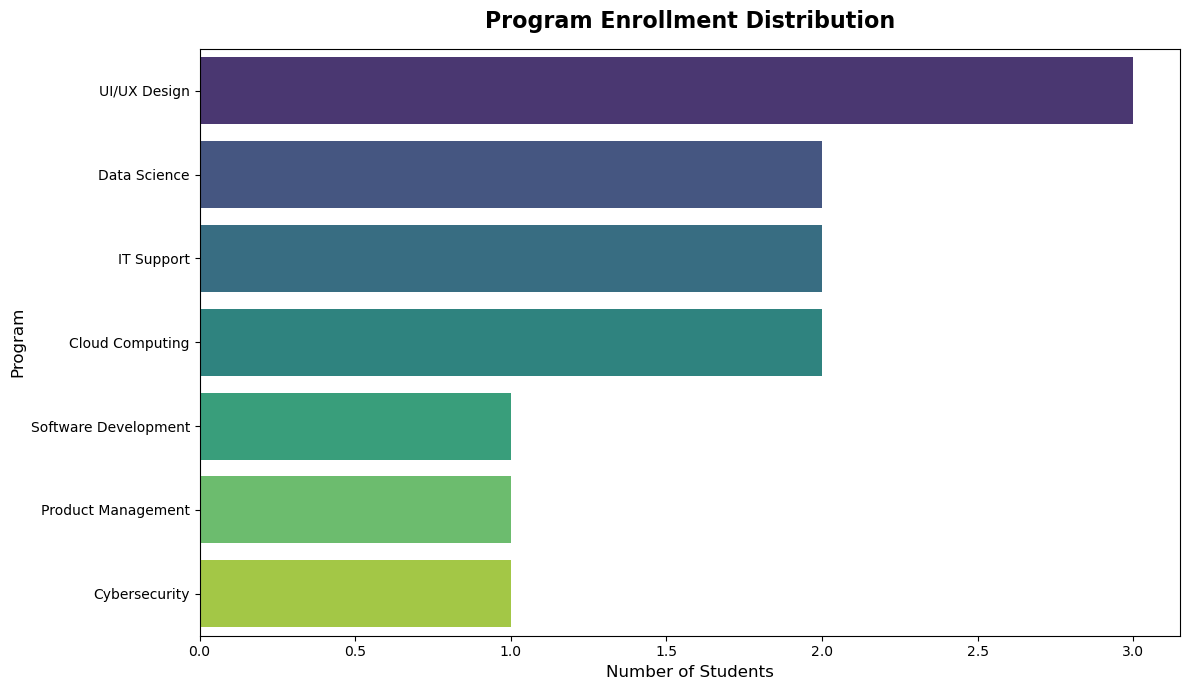

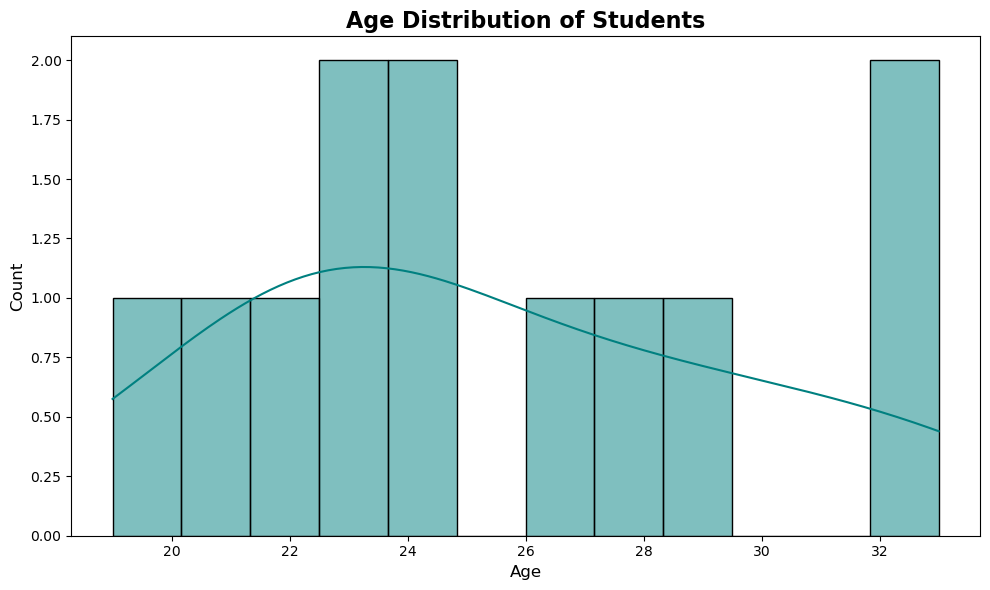

<Figure size 1100x700 with 0 Axes>

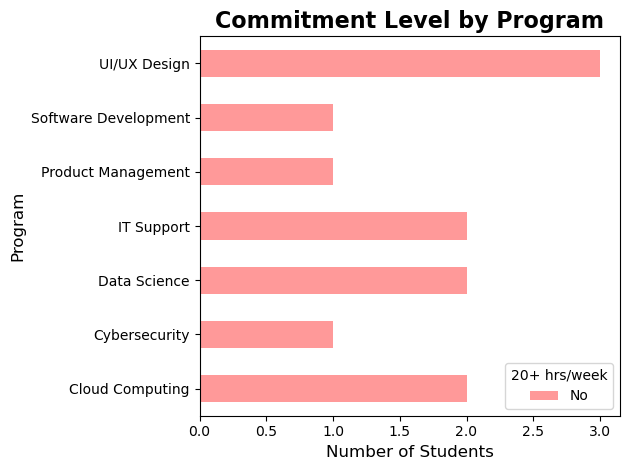


────────────────────────────────────────────────────────────────────────────────
 REGISTERED STUDENTS OVERVIEW
────────────────────────────────────────────────────────────────────────────────
   registration_id         user_name              program  user_age commitment start_date
AETHER-UI-2026-001 Emmanuella Daniel         UI/UX Design        23        yes        NaN
AETHER-DA-2026-002       Errrra Name         Data Science        23        yes 2026-08-01
AETHER-IT-2026-003       Dante Russo           IT Support        24        yes 2026-06-01
AETHER-CC-2026-004   Afolake Olufemi      Cloud Computing        28        yes 2026-08-01
AETHER-UX-2026-005  Chukwudi Adebayo         UI/UX Design        32        yes 2026-04-01
AETHER-SD-2026-006       Daniel Hill Software Development        24        yes 2026-02-01
AETHER-IT-2026-007      Harper Clark           IT Support        29        yes 2026-06-01
AETHER-PM-2026-008      Sophia Brown   Product Management        33        yes 2026-08-

In [12]:
import pandas as pd
import os
import hashlib
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", message=".*use_inf_as_na.*")

# ------------------------------
# Configuration
# ------------------------------
FILE_NAME = "students.csv"
MAX_STUDENTS = 100
CURRENT_YEAR = datetime.now().year

# SECURITY: Password is now hashed. To generate a new hash:
# print(hashlib.sha256("your_password".encode()).hexdigest())
ADMIN_PASSWORD = "aether2026"
ADMIN_PASSWORD_HASH = hashlib.sha256(ADMIN_PASSWORD.encode()).hexdigest()

# Alternative: Use environment variable
# ADMIN_PASSWORD_HASH = os.getenv("AETHER_ADMIN_HASH", ADMIN_PASSWORD_HASH)

# ------------------------------
# Programs Data
# ------------------------------
programs = {
    "Data Science": "Learn data analysis, visualization, and machine learning using Python.",
    "Backend Development": "Build server-side applications and APIs.",
    "Frontend Development": "Create responsive and interactive websites.",
    "Cybersecurity": "Learn how to protect systems and networks.",
    "UI/UX Design": "Design user-friendly digital experiences.",
    "Artificial Intelligence": "Understand intelligent systems and AI models.",
    "Cloud Computing": "Learn cloud infrastructure and deployment.",
    "Software Development": "Learn the full software development lifecycle.",
    "Data Analytics": "Analyze data to support business decisions.",
    "Product Management": "Plan and manage digital products.",
    "Product Design": "Design digital products with user focus.",
    "AI and Automation": "Build automated intelligent systems.",
    "IT Support": "Provide technical support and troubleshooting.",
    "Cloud DevOps": "Automate deployment and cloud operations.",
    "Virtual Assistant": "Learn remote administrative and productivity skills."
}

program_durations = {
    "Data Science": 8, "Backend Development": 6, "Frontend Development": 6,
    "Cybersecurity": 8, "UI/UX Design": 4, "Artificial Intelligence": 10,
    "Cloud Computing": 6, "Software Development": 12, "Data Analytics": 6,
    "Product Management": 6, "Product Design": 4, "AI and Automation": 8,
    "IT Support": 4, "Cloud DevOps": 6, "Virtual Assistant": 4
}

program_codes = {
    "Data Science": "DS",
    "Backend Development": "BE",
    "Frontend Development": "FE",
    "Cybersecurity": "CY",
    "UI/UX Design": "UX",
    "Artificial Intelligence": "AI",
    "Cloud Computing": "CC",
    "Software Development": "SD",
    "Data Analytics": "DA",
    "Product Management": "PM",
    "Product Design": "PD",
    "AI and Automation": "AA",
    "IT Support": "IT",
    "Cloud DevOps": "CD",
    "Virtual Assistant": "VA"
}


# ------------------------------
# Cohort Dates
# ------------------------------
COHORT_START_DATES = [
    datetime(2026, 2, 1), datetime(2026, 4, 1), datetime(2026, 6, 1),
    datetime(2026, 8, 1), datetime(2026, 10, 1), datetime(2026, 12, 1),
]

def get_upcoming_cohorts():
    """Get next 4 upcoming cohorts, rolling to next year if needed"""
    today = datetime.now()
    upcoming = [d for d in COHORT_START_DATES if d > today]
    
    if len(upcoming) < 4:
        next_year = today.year + 1
        future_dates = [datetime(next_year, m, 1) for m in [2, 4, 6, 8, 10, 12]]
        upcoming.extend(future_dates)
    
    return upcoming[:4]


# ------------------------------
# Data Management
# ------------------------------
def load_students():
    """Load student database from CSV"""
    if not os.path.exists(FILE_NAME):
        return pd.DataFrame(columns=[
            "registration_id", "user_name", "user_email", "user_age",
            "program", "commitment", "coding_experience", "interest_area",
            "start_date", "end_date", "learning_institute"
        ])
    
    df = pd.read_csv(FILE_NAME)
    expected_cols = [
        "registration_id", "user_name", "user_email", "user_age",
        "program", "commitment", "coding_experience", "interest_area",
        "start_date", "end_date", "learning_institute"
    ]
    
    for col in expected_cols:
        if col not in df.columns:
            df[col] = ""
    
    return validate_dataframe(df)


def save_students(df):
    """Save student database to CSV"""
    df = validate_dataframe(df)
    df.to_csv(FILE_NAME, index=False)


def validate_dataframe(df):
    """Ensure data integrity"""
    if df.empty:
        return df
    
    # Remove duplicate emails (keep most recent)
    df = df.drop_duplicates(subset=['user_email'], keep='last')
    
    # Ensure ages are valid
    df = df[df['user_age'].between(18, 90)]
    
    return df


# ------------------------------
# Recommendation Systems
# ------------------------------
def get_rule_based_recommendation(age, commitment, coding_exp, interest):
    """Traditional rule-based recommendation"""
    interest = interest.lower()
    
    if coding_exp in ["advanced", "intermediate"]:
        if any(x in interest for x in ["data", "ai", "analytics"]):
            return "Data Science"
        if "web" in interest or "front" in interest:
            return "Frontend Development"
        if "security" in interest:
            return "Cybersecurity"
        return "Software Development"
    else:
        if any(x in interest for x in ["design", "ui", "ux"]):
            return "UI/UX Design"
        if "manage" in interest or "product" in interest:
            return "Product Management"
        return "IT Support"


def get_data_driven_recommendation(age, commitment, coding_exp, interest, df):
    """Enhanced recommendation using historical data"""
    if df.empty or len(df) < 5:
        return get_rule_based_recommendation(age, commitment, coding_exp, interest)
    
    # Find similar students (within 5 years age, same coding level)
    similar = df[
        (df['user_age'].between(age - 5, age + 5)) &
        (df['coding_experience'] == coding_exp)
    ]
    
    if not similar.empty and len(similar) >= 3:
        # Return most popular program among similar students
        popular = similar['program'].mode()
        if not popular.empty:
            return popular[0]
    
    # Fallback to rule-based
    return get_rule_based_recommendation(age, commitment, coding_exp, interest)


# ------------------------------
# Helper Functions
# ------------------------------
def show_programs():
    """Display all available programs"""
    print("\n" + "═"*70)
    print("                     AVAILABLE PROGRAMS")
    print("═"*70)
    for i, (prog, desc) in enumerate(programs.items(), 1):
        duration = program_durations[prog]
        print(f"{i:2d}. {prog:25} → {desc[:45]}... ({duration} weeks)")
    print("═"*70)


def show_public_statistics(df):
    """Display public-facing statistics (no admin access required)"""
    if df.empty:
        print("\n No enrollment data available yet.")
        return
    
    print("\n" + "═"*60)
    print("            ENROLLMENT STATISTICS")
    print("═"*60)
    print(f"Total Students Enrolled: {len(df)}")
    
    print("\n Top 5 Most Popular Programs:")
    top_programs = df['program'].value_counts().head(5)
    for i, (prog, count) in enumerate(top_programs.items(), 1):
        bar = "█" * int(count / len(df) * 40)
        print(f"  {i}. {prog:25} {bar} {count} students")
    
    print(f"\n Average Student Age: {df['user_age'].mean():.1f} years")
    
    commitment_pct = (df['commitment'] == 'yes').mean() * 100
    print(f" High Commitment Rate (20+ hrs/week): {commitment_pct:.1f}%")
    
    print("\n Age Distribution:")
    age_bins = pd.cut(df['user_age'], bins=[17, 24, 30, 40, 90], 
                      labels=['18-24', '25-30', '31-40', '41+'])
    age_dist = age_bins.value_counts(normalize=True).mul(100).round(1)
    for age_group, pct in age_dist.items():
        print(f"  {age_group}: {pct}%")
    
    print("═"*60)


def register_student(df):
    """Register a new student"""
    if len(df) >= MAX_STUDENTS:
        print("\n  Registration is currently full. Please contact admin.")
        return df

    print("\n" + "─"*60)
    print("           STUDENT REGISTRATION FORM")
    print("─"*60)

    # Basic Information
    name = input("Full Name: ").strip()
    if not name:
        print(" Name is required.")
        return df

    email = input("Email Address: ").strip().lower()
    if '@' not in email or '.' not in email:
        print(" Please enter a valid email address.")
        return df

    if (df["user_email"].str.lower() == email).any():
        print(" This email is already registered.")
        return df

    try:
        age = int(input("Age: ").strip())
        if not 18 <= age <= 90:
            print(" Age must be between 18 and 90.")
            return df
    except ValueError:
        print(" Please enter a valid age.")
        return df

    # Commitment Level
    commitment = input("Can you commit 20+ hours per week? (yes/no): ").lower()
    while commitment not in ["yes", "no"]:
        commitment = input("Please answer 'yes' or 'no': ").lower()

    # Coding Experience
    print("\n Coding Experience Level:")
    print("  1. None        2. Beginner")
    print("  3. Intermediate   4. Advanced")
    
    coding_choice = input("→ Select (1-4): ").strip()
    coding_map = {"1": "none", "2": "beginner", "3": "intermediate", "4": "advanced"}
    coding_exp = coding_map.get(coding_choice, "beginner")

    # Interest Area
    print("\n Main Area of Interest:")
    print("  1. Data/AI/Analytics     2. Web Development")
    print("  3. Design/UI/UX          4. Security/Cloud")
    print("  5. Management/Product")
    
    interest_choice = input("→ Select (1-5): ").strip()
    interest_map = {
        "1": "Data & AI", "2": "Web Development", "3": "Design",
        "4": "Security & Cloud", "5": "Management"
    }
    interest = interest_map.get(interest_choice, "General")

    # Program Selection
    show_programs()
    
    # Get recommendation (data-driven if possible)
    recommended = get_data_driven_recommendation(age, commitment, coding_exp, interest, df)
    print(f"\n Our recommendation for you: \033[1m{recommended}\033[0m")
    print(f"   Based on: {coding_exp} coding level + {interest} interest")

    choice = input("\nEnter program number (or press Enter to accept recommendation): ").strip()
    
    if choice == "":
        selected = recommended
    else:
        try:
            idx = int(choice) - 1
            if 0 <= idx < len(programs):
                selected = list(programs.keys())[idx]
            else:
                print("  Invalid selection → using recommendation")
                selected = recommended
        except ValueError:
            print("  Invalid input → using recommendation")
            selected = recommended

    # Cohort Selection
    print("\n Available Upcoming Cohorts:")
    cohorts = get_upcoming_cohorts()
    for i, date in enumerate(cohorts, 1):
        print(f"  {i}. {date.strftime('%d %B %Y')}")

    while True:
        try:
            cohort_choice = int(input(f"\nSelect cohort (1-{len(cohorts)}): ").strip())
            if 1 <= cohort_choice <= len(cohorts):
                start_date = cohorts[cohort_choice - 1]
                break
            else:
                print(f"Please enter a number between 1 and {len(cohorts)}")
        except ValueError:
            print("Please enter a valid number.")

    # Calculate dates and generate ID
    duration = program_durations[selected]
    end_date = start_date + timedelta(weeks=duration)
    
    seq = len(df) + 1
    reg_id = f"AETHER-{program_codes[selected]}-{CURRENT_YEAR}-{seq:03d}"

    # Create new record
    new_row = {
        "registration_id": reg_id,
        "user_name": name,
        "user_email": email,
        "user_age": age,
        "program": selected,
        "commitment": commitment,
        "coding_experience": coding_exp,
        "interest_area": interest,
        "start_date": start_date.strftime("%Y-%m-%d"),
        "end_date": end_date.strftime("%Y-%m-%d"),
        "learning_institute": "Aether Institute"
    }

    df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
    save_students(df)

    # Success message
    print("\n" + "═"*60)
    print("          REGISTRATION SUCCESSFUL! ")
    print("═"*60)
    print(f"  Name           : {name}")
    print(f"  Program        : {selected}")
    print(f"  Duration       : {duration} weeks")
    print(f"  Start Date     : {start_date.strftime('%d %B %Y')}")
    print(f"  Expected End   : {end_date.strftime('%d %B %Y')}")
    print(f"  Registration ID: {reg_id}")
    print("═"*60)
    print(" A confirmation email has been sent to your inbox.")

    return df


def login_and_view_profile(df):
    """Student profile login"""
    email = input("\n Enter your registered email: ").strip().lower()
    match = df[df["user_email"].str.lower() == email]
    
    if match.empty:
        print(" Email not found in our system.")
        print(" Tip: Make sure you've registered first.")
        return

    student = match.iloc[0]
    
    print("\n" + "═"*70)
    print(f"   STUDENT PROFILE - {student['user_name'].upper()}")
    print("═"*70)
    print(f"  Name            : {student['user_name']}")
    print(f"  Email           : {student['user_email']}")
    print(f"  Age             : {student['user_age']}")
    print(f"  Program         : {student['program']}")
    print(f"  Duration        : {program_durations[student['program']]} weeks")
    print(f"  Commitment      : {'20+ hours/week' if student['commitment']=='yes' else 'Under 20 hours/week'}")
    print(f"  Coding Level    : {student['coding_experience'].title()}")
    print(f"  Interest Area   : {student['interest_area'].title()}")
    print(f"  Start Date      : {student['start_date']}")
    print(f"  Expected End    : {student['end_date']}")
    print(f"  Registration ID : {student['registration_id']}")
    print("═"*70)


def admin_mode(df):
    """Admin dashboard with analytics"""
    print("\n Admin Authentication Required")
    
    max_attempts = 3
    for attempt in range(max_attempts):
        password = input("Enter admin password: ").strip()
        password_hash = hashlib.sha256(password.encode()).hexdigest()
        
        if password_hash == ADMIN_PASSWORD_HASH:
            break
        else:
            remaining = max_attempts - attempt - 1
            if remaining > 0:
                print(f" Incorrect password. {remaining} attempt(s) remaining.")
            else:
                print(" Access denied. Too many failed attempts.")
                return df
    
    print("\n" + "═"*80)
    print("           AETHER INSTITUTE - ADMIN ANALYTICS DASHBOARD")
    print("═"*80)

    if df.empty:
        print("\n No students registered yet. Nothing to analyze.")
    else:
        # Quick Insights
        print("\n QUICK INSIGHTS:")
        print(f"  • Total Students: {len(df)}")
        
        most_popular = df['program'].mode()
        if not most_popular.empty:
            count = (df['program'] == most_popular[0]).sum()
            print(f"  • Most Popular Program: {most_popular[0]} ({count} students)")
        
        print(f"  • Average Age: {df['user_age'].mean():.1f} years")
        
        commitment_rate = (df['commitment'] == 'yes').mean() * 100
        print(f"  • High Commitment Rate: {commitment_rate:.1f}%")
        
        # Age Distribution
        print("\n AGE DISTRIBUTION:")
        age_bins = pd.cut(df['user_age'], bins=[17, 24, 30, 40, 90], 
                          labels=['18-24', '25-30', '31-40', '41+'])
        age_dist = age_bins.value_counts(normalize=True).mul(100).round(1)
        for group, pct in age_dist.items():
            print(f"  {group}: {pct}%")
        
        # Visualizations
        print("\n GENERATING VISUALIZATIONS...")
        print("   (Choose display option below)")
        
        print("\n1. Display plots interactively (you'll need to close each window)")
        print("2. Save plots to files (recommended)")
        print("3. Skip visualizations")
        
        viz_choice = input("→ ").strip()
        
        if viz_choice in ["1", "2"]:
            plt.style.use('seaborn-v0_8-pastel')
            
            # 1. Program Enrollment Distribution
            plt.figure(figsize=(12, 7))
            program_counts = df['program'].value_counts()
            sns.barplot(y=program_counts.index, x=program_counts.values, palette='viridis')
            plt.title("Program Enrollment Distribution", fontsize=16, fontweight='bold', pad=15)
            plt.xlabel("Number of Students", fontsize=12)
            plt.ylabel("Program", fontsize=12)
            plt.tight_layout()
            
            if viz_choice == "2":
                plt.savefig('enrollment_distribution.png', dpi=300, bbox_inches='tight')
                print("   Saved: enrollment_distribution.png")
            if viz_choice == "1":
                plt.show()
            plt.close()
            
            # 2. Age Distribution
            plt.figure(figsize=(10, 6))
            sns.histplot(df['user_age'], bins=12, kde=True, color='teal')
            plt.title("Age Distribution of Students", fontsize=16, fontweight='bold')
            plt.xlabel("Age", fontsize=12)
            plt.ylabel("Count", fontsize=12)
            plt.tight_layout()
            
            if viz_choice == "2":
                plt.savefig('age_distribution.png', dpi=300, bbox_inches='tight')
                print("   Saved: age_distribution.png")
            if viz_choice == "1":
                plt.show()
            plt.close()
            
            # 3. Commitment by Program
            plt.figure(figsize=(11, 7))
            commitment_data = pd.crosstab(df['program'], df['commitment'])
            commitment_data.plot(kind='barh', stacked=True, color=['#ff9999', '#66b3ff'])
            plt.title("Commitment Level by Program", fontsize=16, fontweight='bold')
            plt.xlabel("Number of Students", fontsize=12)
            plt.ylabel("Program", fontsize=12)
            plt.legend(title="20+ hrs/week", labels=['No', 'Yes'])
            plt.tight_layout()
            
            if viz_choice == "2":
                plt.savefig('commitment_by_program.png', dpi=300, bbox_inches='tight')
                print("   Saved: commitment_by_program.png")
            if viz_choice == "1":
                plt.show()
            plt.close()
            
            if viz_choice == "2":
                print("\n All visualizations saved to current directory!")

    # Student List
    print("\n" + "─"*80)
    print(" REGISTERED STUDENTS OVERVIEW")
    print("─"*80)
    if not df.empty:
        display_cols = ["registration_id", "user_name", "program", "user_age", 
                       "commitment", "start_date"]
        print(df[display_cols].to_string(index=False))
    print("─"*80)

    # Admin Actions
    print("\n🔧 ADMIN ACTIONS:")
    print("  d = Delete a record")
    print("  e = Export full database to CSV")
    print("  s = Show detailed statistics")
    print("  Any other key = Exit admin mode")
    
    action = input("→ ").lower().strip()
    
    if action == 'd':
        reg_id = input("\nEnter registration ID to delete: ").strip()
        if reg_id in df["registration_id"].values:
            student_name = df[df["registration_id"] == reg_id]["user_name"].values[0]
            confirm = input(f"  Confirm deletion of {student_name} ({reg_id})? (yes/no): ").lower()
            if confirm == "yes":
                df = df[df["registration_id"] != reg_id]
                save_students(df)
                print(f" Record {reg_id} deleted successfully.")
            else:
                print(" Deletion cancelled.")
        else:
            print(" Record not found.")
    
    elif action == 'e':
        export_file = f"aether_export_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
        df.to_csv(export_file, index=False)
        print(f" Full database exported to: {export_file}")
    
    elif action == 's':
        if not df.empty:
            print("\n" + "═"*60)
            print("DETAILED STATISTICS")
            print("═"*60)
            print(df.describe())
            print("\nProgram Distribution:")
            print(df['program'].value_counts())
            print("\nCoding Experience Distribution:")
            print(df['coding_experience'].value_counts())
            print("═"*60)

    return df


# ------------------------------
# Main Application Loop
# ------------------------------
def main():
    """Main application entry point"""
    print("\n Aether Institute Data Portal - Loading...")
    df = load_students()
    print(f" Loaded {len(df)} student records")

    while True:
        print("\n" + "═"*60)
        print("            AETHER INSTITUTE DATA PORTAL")
        print("═"*60)
        print("  1. View Available Programs")
        print("  2. Register New Student")
        print("  3. View My Profile (Login)")
        print("  4. View Public Statistics")
        print("  5. Admin & Analytics Dashboard")
        print("  6. Exit")
        print("═"*60)

        choice = input("→ Select option (1-6): ").strip()

        if choice == "1":
            show_programs()
        
        elif choice == "2":
            df = register_student(df)
        
        elif choice == "3":
            login_and_view_profile(df)
        
        elif choice == "4":
            show_public_statistics(df)
        
        elif choice == "5":
            df = admin_mode(df)
        
        elif choice in ["6", "q", "quit", "exit"]:
            print("\n" + "═"*60)
            print("  Thank you for using Aether Institute Data Portal!")
            print("  See you soon! ")
            print("═"*60)
            break
        
        else:
            print(" Invalid option. Please select 1-6")


if __name__ == "__main__":
    try:
        main()
    except KeyboardInterrupt:
        print("\n\n  Session interrupted. Data saved safely.")
    except Exception as e:
        print(f"\n An error occurred: {e}")
        print("Please contact support if this persists.")